# Introduction to Artificial Neural Networks

## Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Perceptrons

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()
X = iris['data'][:, (2, 3)]
y = (iris.target == 0).astype(np.int)

In [4]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=42,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [5]:
y_pred = per_clf.predict([[2, 0.5]])

In [6]:
y_pred

array([1])

/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


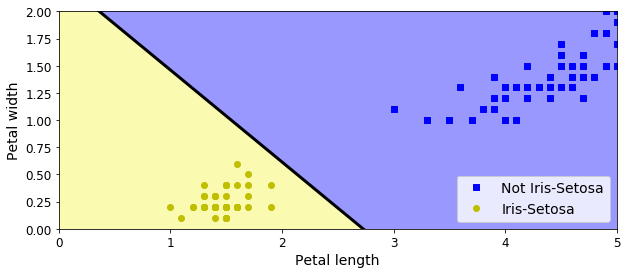

In [7]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show();

## Activation functions

In [8]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

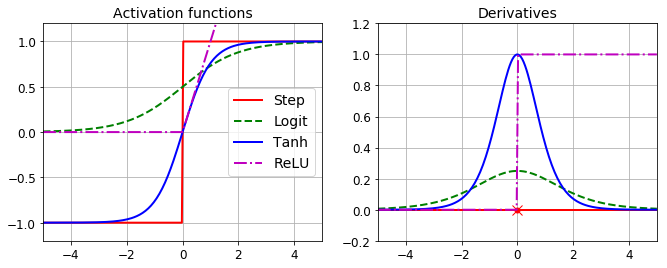

In [9]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show();

In [10]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

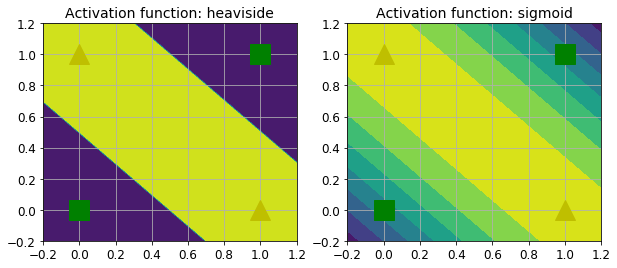

In [11]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True);

## FNN for MNIST

### using tf.learn

In [15]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./tmp/data/")

Extracting ./tmp/data/train-images-idx3-ubyte.gz
Extracting ./tmp/data/train-labels-idx1-ubyte.gz
Extracting ./tmp/data/t10k-images-idx3-ubyte.gz
Extracting ./tmp/data/t10k-labels-idx1-ubyte.gz


In [17]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [19]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42)

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10,
                                        feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_environment': 'local', '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a32accef0>, '_task_type': None, '_is_chief': True, '_log_step_count_steps': 100, '_tf_random_seed': 42,

INFO:tensorflow:step = 2901, loss = 0.1796559 (0.438 sec)
INFO:tensorflow:global_step/sec: 167.855
INFO:tensorflow:step = 3001, loss = 0.016622571 (0.597 sec)
INFO:tensorflow:global_step/sec: 253.805
INFO:tensorflow:step = 3101, loss = 0.046298143 (0.391 sec)
INFO:tensorflow:global_step/sec: 182.203
INFO:tensorflow:step = 3201, loss = 0.0097409915 (0.549 sec)
INFO:tensorflow:global_step/sec: 247.309
INFO:tensorflow:step = 3301, loss = 0.042596392 (0.405 sec)
INFO:tensorflow:global_step/sec: 225.456
INFO:tensorflow:step = 3401, loss = 0.22886415 (0.443 sec)
INFO:tensorflow:global_step/sec: 243.597
INFO:tensorflow:step = 3501, loss = 0.11718831 (0.411 sec)
INFO:tensorflow:global_step/sec: 217.504
INFO:tensorflow:step = 3601, loss = 0.18919225 (0.459 sec)
INFO:tensorflow:global_step/sec: 249.272
INFO:tensorflow:step = 3701, loss = 0.033940688 (0.401 sec)
INFO:tensorflow:global_step/sec: 265.878
INFO:tensorflow:step = 3801, loss = 0.012697114 (0.377 sec)
INFO:tensorflow:global_step/sec: 25

INFO:tensorflow:global_step/sec: 247.724
INFO:tensorflow:step = 11101, loss = 0.00335426 (0.404 sec)
INFO:tensorflow:global_step/sec: 261.624
INFO:tensorflow:step = 11201, loss = 0.0008617498 (0.382 sec)
INFO:tensorflow:global_step/sec: 247.172
INFO:tensorflow:step = 11301, loss = 0.007028841 (0.404 sec)
INFO:tensorflow:global_step/sec: 260.043
INFO:tensorflow:step = 11401, loss = 0.005165516 (0.385 sec)
INFO:tensorflow:global_step/sec: 261.281
INFO:tensorflow:step = 11501, loss = 0.013871371 (0.382 sec)
INFO:tensorflow:global_step/sec: 258.339
INFO:tensorflow:step = 11601, loss = 0.0008563559 (0.387 sec)
INFO:tensorflow:global_step/sec: 266.25
INFO:tensorflow:step = 11701, loss = 0.003660091 (0.376 sec)
INFO:tensorflow:global_step/sec: 256.968
INFO:tensorflow:step = 11801, loss = 0.00069391116 (0.389 sec)
INFO:tensorflow:global_step/sec: 246.626
INFO:tensorflow:step = 11901, loss = 0.0059790947 (0.405 sec)
INFO:tensorflow:global_step/sec: 243.903
INFO:tensorflow:step = 12001, loss = 0

INFO:tensorflow:global_step/sec: 253.285
INFO:tensorflow:step = 19101, loss = 0.0007308759 (0.395 sec)
INFO:tensorflow:global_step/sec: 256.316
INFO:tensorflow:step = 19201, loss = 0.001157449 (0.390 sec)
INFO:tensorflow:global_step/sec: 226.368
INFO:tensorflow:step = 19301, loss = 0.005768106 (0.444 sec)
INFO:tensorflow:global_step/sec: 229.152
INFO:tensorflow:step = 19401, loss = 0.0014203099 (0.435 sec)
INFO:tensorflow:global_step/sec: 176.024
INFO:tensorflow:step = 19501, loss = 0.0017869618 (0.569 sec)
INFO:tensorflow:global_step/sec: 166.797
INFO:tensorflow:step = 19601, loss = 0.00073653343 (0.603 sec)
INFO:tensorflow:global_step/sec: 178.425
INFO:tensorflow:step = 19701, loss = 0.00010960117 (0.556 sec)
INFO:tensorflow:global_step/sec: 166.305
INFO:tensorflow:step = 19801, loss = 0.00060270104 (0.601 sec)
INFO:tensorflow:global_step/sec: 162.345
INFO:tensorflow:step = 19901, loss = 0.0024072658 (0.616 sec)
INFO:tensorflow:global_step/sec: 207.443
INFO:tensorflow:step = 20001, l

INFO:tensorflow:global_step/sec: 221.34
INFO:tensorflow:step = 27101, loss = 0.00052124826 (0.452 sec)
INFO:tensorflow:global_step/sec: 214.561
INFO:tensorflow:step = 27201, loss = 0.0003748194 (0.467 sec)
INFO:tensorflow:global_step/sec: 219.209
INFO:tensorflow:step = 27301, loss = 0.0013068019 (0.456 sec)
INFO:tensorflow:global_step/sec: 243.785
INFO:tensorflow:step = 27401, loss = 0.0004216543 (0.410 sec)
INFO:tensorflow:global_step/sec: 256.918
INFO:tensorflow:step = 27501, loss = 0.0011037143 (0.389 sec)
INFO:tensorflow:global_step/sec: 252.118
INFO:tensorflow:step = 27601, loss = 0.0011348991 (0.396 sec)
INFO:tensorflow:global_step/sec: 259.315
INFO:tensorflow:step = 27701, loss = 0.00021862882 (0.388 sec)
INFO:tensorflow:global_step/sec: 256.831
INFO:tensorflow:step = 27801, loss = 0.00014751096 (0.388 sec)
INFO:tensorflow:global_step/sec: 257.392
INFO:tensorflow:step = 27901, loss = 0.00052687305 (0.388 sec)
INFO:tensorflow:global_step/sec: 248.333
INFO:tensorflow:step = 28001,

INFO:tensorflow:global_step/sec: 221.178
INFO:tensorflow:step = 35101, loss = 0.00068058027 (0.452 sec)
INFO:tensorflow:global_step/sec: 236.077
INFO:tensorflow:step = 35201, loss = 0.00022831745 (0.424 sec)
INFO:tensorflow:global_step/sec: 248.022
INFO:tensorflow:step = 35301, loss = 0.00015026171 (0.403 sec)
INFO:tensorflow:global_step/sec: 247.983
INFO:tensorflow:step = 35401, loss = 0.0011304267 (0.404 sec)
INFO:tensorflow:global_step/sec: 247.457
INFO:tensorflow:step = 35501, loss = 0.00032880838 (0.405 sec)
INFO:tensorflow:global_step/sec: 250.582
INFO:tensorflow:step = 35601, loss = 0.00030658182 (0.398 sec)
INFO:tensorflow:global_step/sec: 258.241
INFO:tensorflow:step = 35701, loss = 0.0008278083 (0.387 sec)
INFO:tensorflow:global_step/sec: 251.402
INFO:tensorflow:step = 35801, loss = 0.0006247681 (0.398 sec)
INFO:tensorflow:global_step/sec: 255.673
INFO:tensorflow:step = 35901, loss = 0.0003814566 (0.392 sec)
INFO:tensorflow:global_step/sec: 249.599
INFO:tensorflow:step = 3600

SKCompat()

In [21]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/sv/zdn4rzk93hx5_7bkrtmcfbk00000gn/T/tmphdk6fr57/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9836

In [22]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.07124013736712159

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [26]:
X_test_scaled = scaler.transform(X_test)

In [27]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100],
                                         n_classes=10,
                                         feature_columns=feature_cols,
                                         config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(X_train_scaled, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_environment': 'local', '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1107226d8>, '_task_type': None, '_is_chief': True, '_log_step_count_steps': 100, '_tf_random_seed': 42, '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_train_distribute': None, '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_save_summary_steps': 100, '_model_dir': '/var/folders/sv/zdn4rzk93hx5_7bkrtmcfbk00000gn/T/tmpfwjuw1_p', '_session_config': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_task_id': 0}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/sv/zdn4rzk93hx5_7bkrtmcfbk00000gn/T/tmpfwjuw1_p/model.ckpt.
INFO:tenso

INFO:tensorflow:step = 7101, loss = 0.0014691 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.765
INFO:tensorflow:step = 7201, loss = 0.015454935 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.248
INFO:tensorflow:step = 7301, loss = 0.0030526167 (0.395 sec)
INFO:tensorflow:global_step/sec: 262.425
INFO:tensorflow:step = 7401, loss = 0.008485965 (0.381 sec)
INFO:tensorflow:global_step/sec: 255.691
INFO:tensorflow:step = 7501, loss = 0.0041380115 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.273
INFO:tensorflow:step = 7601, loss = 0.0018844026 (0.391 sec)
INFO:tensorflow:global_step/sec: 252.404
INFO:tensorflow:step = 7701, loss = 0.0028519938 (0.398 sec)
INFO:tensorflow:global_step/sec: 249.342
INFO:tensorflow:step = 7801, loss = 0.0019232156 (0.399 sec)
INFO:tensorflow:global_step/sec: 251.572
INFO:tensorflow:step = 7901, loss = 0.033658817 (0.398 sec)
INFO:tensorflow:global_step/sec: 246.947
INFO:tensorflow:step = 8001, loss = 0.0015352335 (0.404 sec)
INFO:tensorflow:global_step

INFO:tensorflow:step = 15101, loss = 0.00055505603 (0.407 sec)
INFO:tensorflow:global_step/sec: 248.196
INFO:tensorflow:step = 15201, loss = 0.0005787828 (0.403 sec)
INFO:tensorflow:global_step/sec: 255.509
INFO:tensorflow:step = 15301, loss = 0.0005193614 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.161
INFO:tensorflow:step = 15401, loss = 0.00053730817 (0.393 sec)
INFO:tensorflow:global_step/sec: 248.914
INFO:tensorflow:step = 15501, loss = 0.0019056636 (0.402 sec)
INFO:tensorflow:global_step/sec: 258.519
INFO:tensorflow:step = 15601, loss = 0.00080126815 (0.387 sec)
INFO:tensorflow:global_step/sec: 250.625
INFO:tensorflow:step = 15701, loss = 0.0030766542 (0.399 sec)
INFO:tensorflow:global_step/sec: 246.803
INFO:tensorflow:step = 15801, loss = 0.00053667574 (0.405 sec)
INFO:tensorflow:global_step/sec: 259.933
INFO:tensorflow:step = 15901, loss = 0.00037178813 (0.384 sec)
INFO:tensorflow:global_step/sec: 245.069
INFO:tensorflow:step = 16001, loss = 0.0015784806 (0.409 sec)
INFO:t

INFO:tensorflow:global_step/sec: 251.779
INFO:tensorflow:step = 23101, loss = 0.0013686147 (0.398 sec)
INFO:tensorflow:global_step/sec: 245.738
INFO:tensorflow:step = 23201, loss = 0.0006888509 (0.406 sec)
INFO:tensorflow:global_step/sec: 248.727
INFO:tensorflow:step = 23301, loss = 0.00085895613 (0.403 sec)
INFO:tensorflow:global_step/sec: 248.162
INFO:tensorflow:step = 23401, loss = 0.0003028565 (0.402 sec)
INFO:tensorflow:global_step/sec: 257.847
INFO:tensorflow:step = 23501, loss = 0.00036489565 (0.388 sec)
INFO:tensorflow:global_step/sec: 251.393
INFO:tensorflow:step = 23601, loss = 0.00017413827 (0.398 sec)
INFO:tensorflow:global_step/sec: 254.781
INFO:tensorflow:step = 23701, loss = 4.9577873e-05 (0.392 sec)
INFO:tensorflow:global_step/sec: 249.242
INFO:tensorflow:step = 23801, loss = 0.00040017025 (0.402 sec)
INFO:tensorflow:global_step/sec: 252.38
INFO:tensorflow:step = 23901, loss = 0.0010802273 (0.396 sec)
INFO:tensorflow:global_step/sec: 232.354
INFO:tensorflow:step = 24001

INFO:tensorflow:step = 31001, loss = 0.0004060798 (0.414 sec)
INFO:tensorflow:global_step/sec: 248.002
INFO:tensorflow:step = 31101, loss = 0.0002650303 (0.403 sec)
INFO:tensorflow:global_step/sec: 251.601
INFO:tensorflow:step = 31201, loss = 0.00023069182 (0.398 sec)
INFO:tensorflow:global_step/sec: 208.676
INFO:tensorflow:step = 31301, loss = 0.00027735723 (0.480 sec)
INFO:tensorflow:global_step/sec: 207.373
INFO:tensorflow:step = 31401, loss = 0.00047485105 (0.481 sec)
INFO:tensorflow:global_step/sec: 231.435
INFO:tensorflow:step = 31501, loss = 6.274228e-05 (0.433 sec)
INFO:tensorflow:global_step/sec: 254.357
INFO:tensorflow:step = 31601, loss = 4.5325345e-05 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.581
INFO:tensorflow:step = 31701, loss = 0.00025819233 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.054
INFO:tensorflow:step = 31801, loss = 0.00015646676 (0.391 sec)
INFO:tensorflow:global_step/sec: 245.82
INFO:tensorflow:step = 31901, loss = 0.00047182234 (0.407 sec)
INFO:

INFO:tensorflow:global_step/sec: 243.31
INFO:tensorflow:step = 39001, loss = 0.00020742463 (0.411 sec)
INFO:tensorflow:global_step/sec: 257.208
INFO:tensorflow:step = 39101, loss = 0.00015584484 (0.388 sec)
INFO:tensorflow:global_step/sec: 250.622
INFO:tensorflow:step = 39201, loss = 0.00027670813 (0.399 sec)
INFO:tensorflow:global_step/sec: 254.338
INFO:tensorflow:step = 39301, loss = 6.937773e-05 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.561
INFO:tensorflow:step = 39401, loss = 0.00017417435 (0.395 sec)
INFO:tensorflow:global_step/sec: 257.891
INFO:tensorflow:step = 39501, loss = 1.7634353e-05 (0.388 sec)
INFO:tensorflow:global_step/sec: 251.876
INFO:tensorflow:step = 39601, loss = 0.0004391472 (0.396 sec)
INFO:tensorflow:global_step/sec: 253.991
INFO:tensorflow:step = 39701, loss = 0.00010326081 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.828
INFO:tensorflow:step = 39801, loss = 0.0003402715 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.992
INFO:tensorflow:step = 3990

SKCompat()

In [29]:
y_pred = dnn_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/sv/zdn4rzk93hx5_7bkrtmcfbk00000gn/T/tmpfwjuw1_p/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9775

### Using plain TensorFlow

In [30]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [31]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [32]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel") # weights (n_inputs, n_neurons)
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [33]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [34]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [35]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

In [36]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [37]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [38]:
n_epochs = 40
batch_size = 50

In [40]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                            y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.94 Val accuracy: 0.915
1 Train accuracy: 0.94 Val accuracy: 0.9346
2 Train accuracy: 0.94 Val accuracy: 0.9464
3 Train accuracy: 0.96 Val accuracy: 0.951
4 Train accuracy: 1.0 Val accuracy: 0.9588
5 Train accuracy: 0.94 Val accuracy: 0.9592
6 Train accuracy: 0.96 Val accuracy: 0.9606
7 Train accuracy: 0.96 Val accuracy: 0.963
8 Train accuracy: 0.94 Val accuracy: 0.964
9 Train accuracy: 0.98 Val accuracy: 0.9658
10 Train accuracy: 0.96 Val accuracy: 0.9692
11 Train accuracy: 1.0 Val accuracy: 0.969
12 Train accuracy: 1.0 Val accuracy: 0.97
13 Train accuracy: 1.0 Val accuracy: 0.9686
14 Train accuracy: 1.0 Val accuracy: 0.9716
15 Train accuracy: 0.96 Val accuracy: 0.9722
16 Train accuracy: 0.98 Val accuracy: 0.9742
17 Train accuracy: 0.96 Val accuracy: 0.974
18 Train accuracy: 1.0 Val accuracy: 0.976
19 Train accuracy: 0.98 Val accuracy: 0.9754
20 Train accuracy: 0.98 Val accuracy: 0.9742
21 Train accuracy: 0.98 Val accuracy: 0.9746
22 Train accuracy: 0.98 Val accurac

In [45]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [46]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [47]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [48]:
show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`

Note: the book uses `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [49]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [50]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [51]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [52]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [53]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [54]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [55]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [56]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.9 Test accuracy: 0.9019
1 Train accuracy: 0.92 Test accuracy: 0.9177
2 Train accuracy: 0.96 Test accuracy: 0.93
3 Train accuracy: 0.94 Test accuracy: 0.9383
4 Train accuracy: 0.94 Test accuracy: 0.9433
5 Train accuracy: 0.94 Test accuracy: 0.9494
6 Train accuracy: 0.98 Test accuracy: 0.9518
7 Train accuracy: 0.94 Test accuracy: 0.9557
8 Train accuracy: 1.0 Test accuracy: 0.9567
9 Train accuracy: 1.0 Test accuracy: 0.9597
10 Train accuracy: 1.0 Test accuracy: 0.962
11 Train accuracy: 0.96 Test accuracy: 0.9641
12 Train accuracy: 0.98 Test accuracy: 0.9653
13 Train accuracy: 0.96 Test accuracy: 0.9661
14 Train accuracy: 0.96 Test accuracy: 0.9679
15 Train accuracy: 1.0 Test accuracy: 0.9691
16 Train accuracy: 0.96 Test accuracy: 0.9698
17 Train accuracy: 0.98 Test accuracy: 0.9701
18 Train accuracy: 0.98 Test accuracy: 0.9713
19 Train accuracy: 0.98 Test accuracy: 0.9725


In [57]:
show_graph(tf.get_default_graph())